In [20]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Initialize circuit with 3 qubits and 2 classical bits
qc = QuantumCircuit(3, 2)

# Prepare arbitrary state to teleport
qc.x(0)
qc.barrier()

# Create entangled pair (Bell state between qubits 1-2)
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# Alice's operations
qc.cx(0, 1)
qc.h(0)
qc.measure([0,1], [0,1])
qc.barrier()

# Bob's conditional operations 
with qc.if_test((qc.clbits[0], 1)):  # If classical bit 0 == 1
    qc.z(2)
with qc.if_test((qc.clbits[1], 1)):  # If classical bit 1 == 1
    qc.x(2)


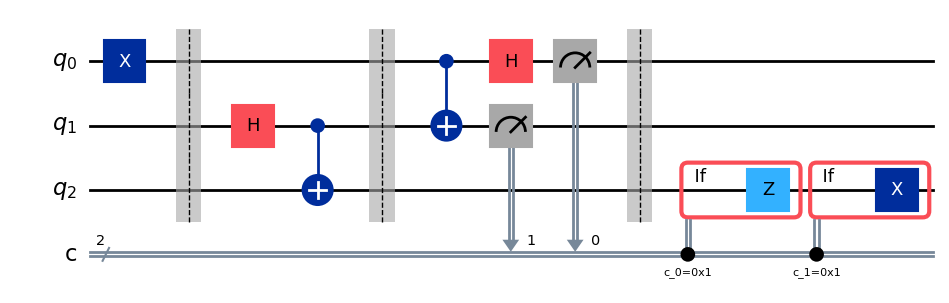

In [21]:
from qiskit_aer import AerSimulator

simulator = AerSimulator()
result = simulator.run(qc, shots=10000).result()

qc.draw(output='mpl')

In [22]:
print(result.get_counts())

{'11': 2491, '00': 2556, '01': 2459, '10': 2494}


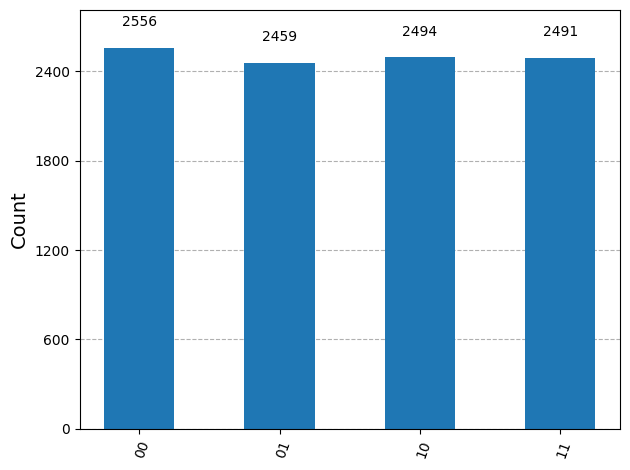

In [23]:
plot_histogram(result.get_counts())